In [8]:
# Se importan las librerias a susar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# --- Muestra de DataFrame ---

data = {
    'wellName': ['CARDALES_1N','CARDALES_1N', 'CARDALES_1N'],
    'TDEP': [5597, 5607, 5622],     # Profundidad
    'Azimuth': [278, 265, 270],     # Rumbo
    'Dip_RV2025_TRU': [10, 16, 14],     # Buzamiento
    'Type': ['Cross bedding', 'Bedding', 'Partially Open Fracture'],
}
df = pd.DataFrame(data)
print(df)

      wellName  TDEP  Azimuth  Dip_RV2025_TRU                     Type
0  CARDALES_1N  5597      278              10            Cross bedding
1  CARDALES_1N  5607      265              16                  Bedding
2  CARDALES_1N  5622      270              14  Partially Open Fracture


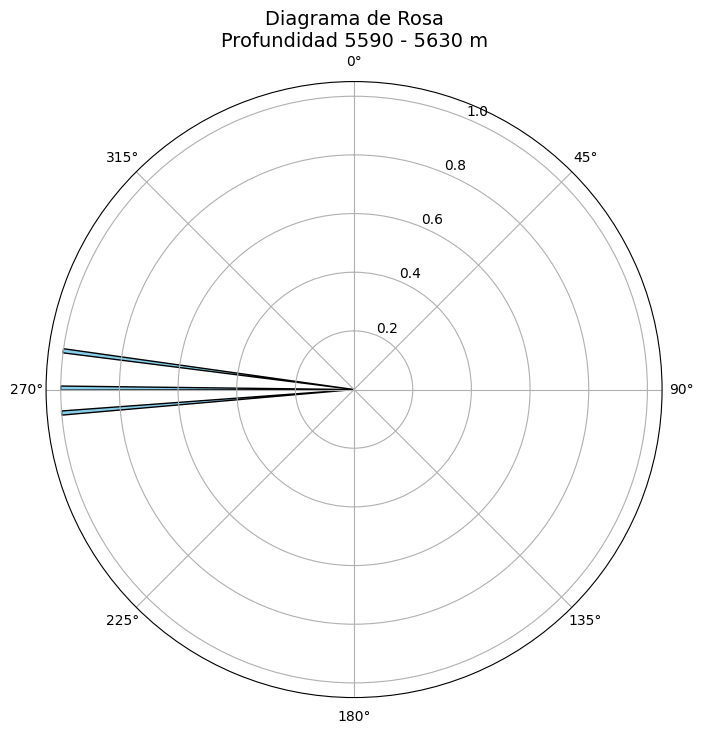

In [29]:
df = pd.DataFrame(data)

# --- Parámetros de filtro ---
prof_min = 5590   # Profundidad mínima
prof_max = 5630   # Profundidad máxima

# --- Filtrar por rango de profundidad ---
df_filtrado = df[(df['TDEP'] >= prof_min) & (df['TDEP'] <= prof_max)]

# --- Extraer azimuts ---
azimuths = df_filtrado['Azimuth'].values

# Convertir azimuts a radianes para la rosa
azimuths_rad = np.deg2rad(azimuths)

# --- Crear diagrama de rosa ---
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Histograma circular
n, bins, patches = ax.hist(
    azimuths_rad,
    bins=16,                       # Número de divisiones de la rosa
    color='skyblue',
    edgecolor='black'
)

# Ajustar el ángulo 0° al Norte y el sentido horario
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Etiquetas de título
plt.title(f"Diagrama de Rosa\nProfundidad {prof_min} - {prof_max} m", fontsize=14)

plt.show()